In [199]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Forward Propagation

Assuming bias = 0

In [204]:
num_samples = len(iris.data[:,2])

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)

X = iris['data'][shuffle_order,0:2]
y = iris['data'][shuffle_order,2]
y = y.reshape((len(y),1)) #Important, must convert, or result will be wrong!
X /= X.max()
y /= y.max()

# sum squared error
def cost(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

class Neural_Network(object):
    def __init__(self, n0, n1, n2):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2
        
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1, self.n2)
        
    def predict(self, q):
        z = np.dot(q, self.W1)
        z = sigmoid(z)
        y_pred = np.dot(z, self.W2)
        return y_pred

net = Neural_Network(2,3,1)

In [206]:
y_pred = net.predict(X)
error = cost(y_pred, y)
print(error)

5.056927914573047


In [208]:
import itertools

def get_gradiant(net, X, y):
    w_delta = 1e-8

    y_pred_current = net.predict(X)
    error_current = cost(y_pred_current, y)

    dw1 = np.zeros((net.n0,net.n1))
    dw2 = np.zeros((net.n1,net.n2))

    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    for i,j in itertools.product(range(net.n0),range(net.n1)):
        net.W1 = np.copy(W1)
        net.W1[i][j] += w_delta
        y_pred = net.predict(X)
        error = cost(y_pred, y)
        dJdw = (error - error_current) / w_delta
        dw1[i][j] = dJdw

    for i,j in itertools.product(range(net.n1),range(net.n2)):
        net.w2 = np.copy(W2)
        net.W2[i][j] += w_delta
        y_pred = net.predict(X)
        error = cost(y_pred, y)
        dJdw = (error - error_current) / w_delta
        dw2[i][j] = dJdw

    # restore original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)
    
    return dw1,dw2

In [215]:
#current cost
y_orig = net.predict(X)
init_cost = cost(y_orig, y)

n_epochs = 2000
learning_rate = 0.01

errors = []

print("Initial cost = %0.3f" % init_cost)

Initial cost = 0.596


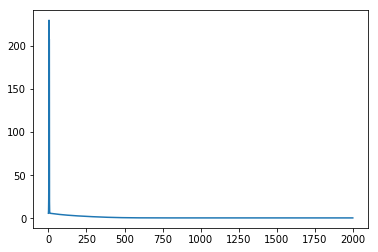

In [210]:
for i in range(n_epochs):
    dw1, dw2 = get_gradiant(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = cost(y_pred,y)
    errors.append(error)    

plt.plot(range(len(errors)),errors)